# DSM150 - Neural Networks Coursework 2

## Introduction

Introduced to the major public ChatGPT quickly demonstrated the enormous potential of Large Language Models(LLMs). This marked the beginning of a new era where the concepts of neural networks left academic circles, becoming a topic of conversations of everyday life. Subsequently, these LLMs introduced the capability of image recognition. Users are able to upload images and let them be analyzed and described by LLMs, which further underlined the versatility and potential of neural networks. Today, Convolutional Neural Networks have found extensive application across various fields. From medical imaging, such as fraction detection in x-ray images, to the 'simple' object detection on smartphones. The impact of CNNs is both profound and pervasive. This coursework report seeks to explore the practical realization of CNNs, as presented in "Deep Learning with Python", highlighting the indispensable role in the digital age. 


### Classification Task Overview

Following to the introduction, this section aims to define the specific classification task that forms the core focus of the coursework. The objective is to develop an CNN model capable to accurately classify images of animals into five distinct category, each representing a different type of animal. The animals for the classification tasks are as follows:
- Category 1: Cat
- Category 2: Dog
- Category 3: Elephant
- Category 4: Horse
- Category 5: Lion

The task is designed ti challenge the models ability to discem and learn from the unique feature characteristics of each animal type, ranging from texture and shape to size and environmental context. 





## Dataset Description

The dataset that is used for the classification task holds images representing five distinct animal categories ( also see 'Classification Task Overview'). These datset was sourced from Kaggle and can be found under the name 'Animals - Animals Classification Dataset [1]'. It contains 15'000 pictures of animals, which has been collected from Google Images. The Dataset is splitted in training images and validation images. The validation sets holds 300 images for each animal type. This roughly represents the relative size of 11% of the training images.

## Course Work Approach

This course work adopts a structured, iterative approach to explore, implement and refine Convolutional Neural Networks (CNNs) for an image recognitions task. The approach can be subdivided into distinct phases, each designed to build-up on the previous steps.  The process is as follows:

1. Exploring the Images:
- Show Images: A subset of the dataset will be visually examined to understand the variety and characteristics of the data. This step is designed to create an understanding of potential challenges in image recognition tasks, such as image orientation and lighting.
- Count of Images -> Class Distribution: This step is designed to picture the class distribution of target classes. This step is supposed to detect any class imbalances. A balanced dataset is essential to create a robust and unbiased model.

2. Loading and Preparation:
- This phase covers the image loading and preparation for the model training. This tasks covers preprocessing steps like image normalizing and rescaling the data, implementing an image generator and applying data augmentation techniques.

3. Define a Base Model:
- A baseline CNN is created and trained on the dataset prepared on the previous step. The model is supposed to serve as a reference in terms of performance and accuracy to identify areas of improvement.

4. Evaluate Base Model:
- Print Standard Parameters: Commonly parameters will be plotted such as trainings and validation accuracy in relation to observe the different training stages of the model. 
- Print Confusion Matrix: The performance of the baseline model will be evaluated by creating a confusion matrix, which gives insights to the models accuracy, recall and precision.

5. Structured Approach to improve Base Model:
- A systematic approach will be employed to  iteratively improve the base model. This involves changes in the architectures.

6. Using a Pretraine Convolutional Network:
- To further discover different techniques, a pretrained CNN will be incorporated. This approach will a allow the model to benefit from features learned on  vast amount of pictures and objects, aiming to improve the generalization capabilities. 

7. Visualizing Structures:
- Finally, the internal structures and features learned by the CNN will be visualized. This step is crucial for understanding how the model interprets and processes image data, providing valuable insights into its decision-making process.

## 1. Exploring the Images:

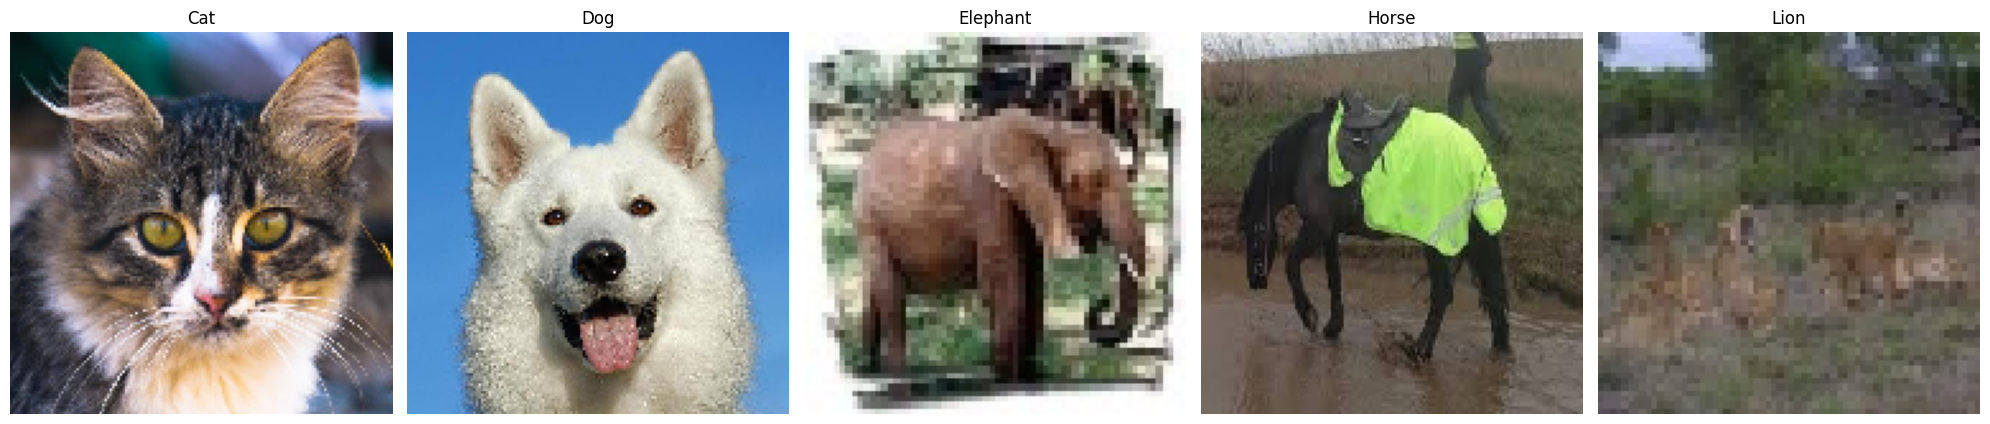

In [1]:
import os, random
from keras.preprocessing import image
import matplotlib.pyplot as plt

dir_base_train= './data/animals/train/'
dir_train_cat= os.path.join(dir_base_train,'cat')
dir_train_dog= os.path.join(dir_base_train,'dog')
dir_train_elephant= os.path.join(dir_base_train,'elephant')
dir_train_horse= os.path.join(dir_base_train,'horse')
dir_train_lion= os.path.join(dir_base_train,'lion')

cat_path_img= os.path.join(dir_train_cat, random.choice(os.listdir(dir_train_cat)))
dog_path_img= os.path.join(dir_train_dog,random.choice(os.listdir(dir_train_dog)))
elephant_path_img= os.path.join(dir_train_elephant,random.choice(os.listdir(dir_train_elephant)))
horse_path_img= os.path.join(dir_train_horse, random.choice(os.listdir(dir_train_horse)))
lion_path_img= os.path.join(dir_train_lion, random.choice(os.listdir(dir_train_lion)))

cat_img = image.img_to_array(image.load_img(cat_path_img, target_size=(150,150)))
dog_img = image.img_to_array(image.load_img(dog_path_img, target_size=(150,150)))
elephant_img = image.img_to_array(image.load_img(elephant_path_img, target_size=(150,150)))
horse_img = image.img_to_array(image.load_img(horse_path_img, target_size=(150,150)))
lion_img = image.img_to_array(image.load_img(lion_path_img, target_size=(150,150)))

# Set up the matplotlib figure and axes, specifying the figure size and the grid layout
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# List of the images
images = [cat_img, dog_img, elephant_img, horse_img, lion_img]

# Titles for each subplot
titles = ['Cat', 'Dog', 'Elephant', 'Horse', 'Lion']

# Plot each image
for i, ax in enumerate(axes.flat):
    # Display image
    ax.imshow(images[i] / 255.)  # Normalize the image to [0,1] since matplotlib expects floats in [0,1] or integers in [0, 255]
    ax.set_title(titles[i])  # Set a title for each subplot
    ax.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()  # Display the figure with the images


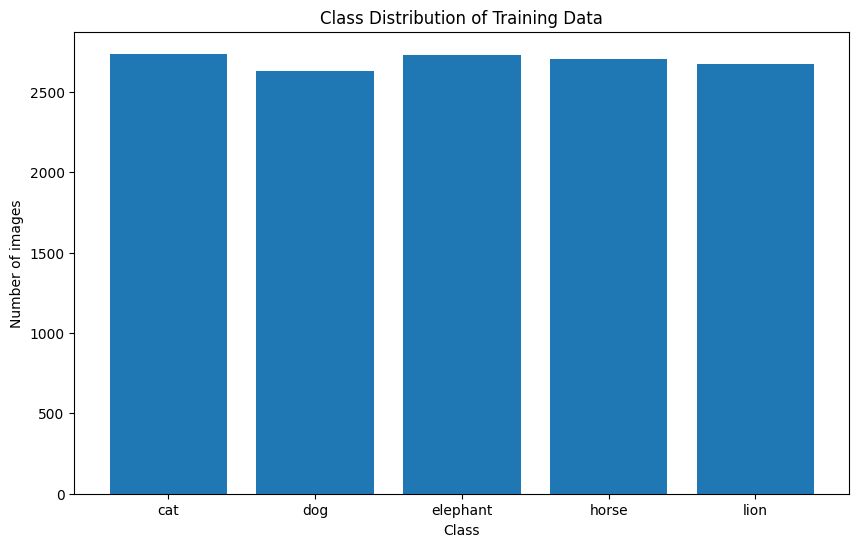

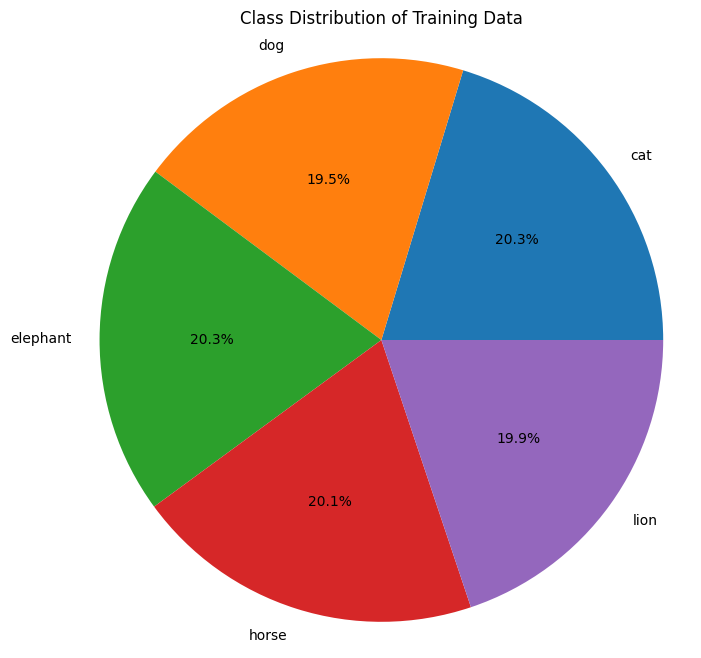

In [2]:
# Class distributions Images
classes = ['cat', 'dog', 'elephant', 'horse', 'lion']
class_counts = {}

for class_name in classes:
    dir_path = os.path.join(dir_base_train, class_name)
    class_counts[class_name] = len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))])

# Data
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Class Distribution of Training Data')
plt.show()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=classes, autopct='%1.1f%%')
plt.title('Class Distribution of Training Data')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

On the above charts can be seen, that the data is almost equally distributed. Only minor differences can be stopped between each class. As a result there is not need to take care of under- or overrepresented classes in the process of data preparation. There is no risk of a bias caused by an imbalanced dataset.

# 2. Loading and Preparation

The used dateset was downloaded from Kaggel.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers

In [4]:
# define base directory where pictures stored
dir_base_train= './data/animals/train/'
dir_base_val= './data/animals/val/'

In [5]:
# import lib for Image Generator
#from keras.preprocessing.image import ImageDataGenerator

# rescale images by 1/255
train_datagen= ImageDataGenerator(rescale=1./255)
val_datagen= ImageDataGenerator(rescale=1./255)

# read img from target dirs, resize image to 150x150, 
train_generator= train_datagen.flow_from_directory(
    dir_base_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    shuffle= True
    
)


Found 13474 images belonging to 5 classes.


In [6]:
val_generator= val_datagen.flow_from_directory(
    dir_base_val,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

Found 1497 images belonging to 5 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break

Data batch shape: (64, 150, 150, 3)
Labels batch shape: (64, 5)


In [8]:
input_shape= (150, 150, 3)

In [66]:
# intializing model
model= models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape= input_shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [67]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 17, 17, 64)       

In [68]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
steps_per_epoch= train_generator.samples // train_generator.batch_size
validation_steps= val_generator.samples // val_generator.batch_size

In [94]:
train_generator.samples // train_generator.batch_size

210

In [71]:
history= model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs= 50,
    validation_data= val_generator,
    validation_steps= validation_steps
)

Epoch 1/50
210/210 [==============================] - 30s 140ms/step - loss: 1.0496 - accuracy: 0.5939 - val_loss: 0.6730 - val_accuracy: 0.7378
Epoch 2/50
210/210 [==============================] - 29s 136ms/step - loss: 0.6025 - accuracy: 0.7711 - val_loss: 0.5129 - val_accuracy: 0.8186
Epoch 3/50
210/210 [==============================] - 29s 137ms/step - loss: 0.4616 - accuracy: 0.8278 - val_loss: 0.4166 - val_accuracy: 0.8505
Epoch 4/50
210/210 [==============================] - 29s 137ms/step - loss: 0.3931 - accuracy: 0.8513 - val_loss: 0.4562 - val_accuracy: 0.8288
Epoch 5/50
210/210 [==============================] - 29s 136ms/step - loss: 0.3204 - accuracy: 0.8800 - val_loss: 0.4157 - val_accuracy: 0.8404
Epoch 6/50
210/210 [==============================] - 29s 138ms/step - loss: 0.2590 - accuracy: 0.9028 - val_loss: 0.4847 - val_accuracy: 0.8247
Epoch 7/50
210/210 [==============================] - 29s 138ms/step - loss: 0.2048 - accuracy: 0.9250 - val_loss: 0.4608 - val_ac

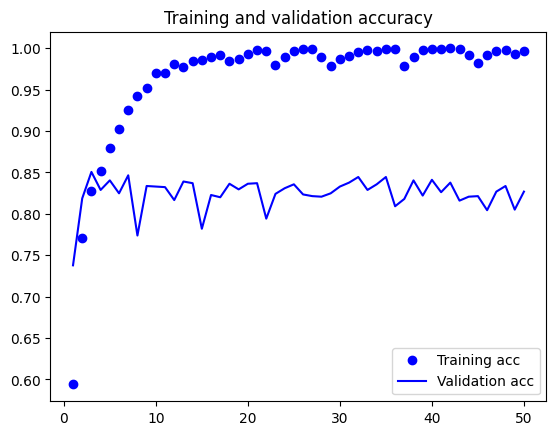

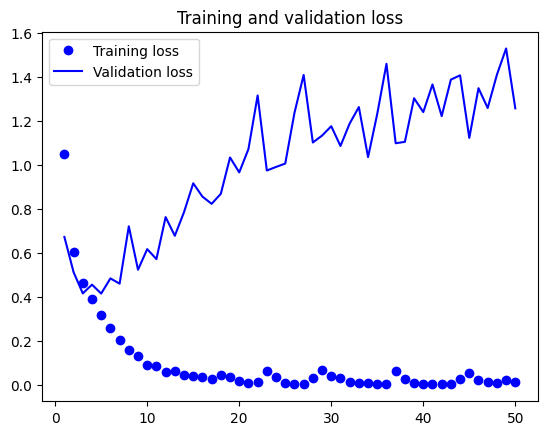

In [72]:
import matplotlib.pyplot as plt

acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The model show classical signs of overfitting. 

In [26]:
# intializing model
simple_model= models.Sequential()
simple_model.add(layers.Conv2D(8, (3,3), activation='relu', input_shape= input_shape))
simple_model.add(layers.MaxPooling2D((2,2)))
simple_model.add(layers.Conv2D(16, (3,3), activation= 'relu'))
simple_model.add(layers.MaxPooling2D((2,2)))
simple_model.add(layers.Flatten())
simple_model.add(layers.Dense(20, activation='relu'))
simple_model.add(layers.Dense(5, activation='softmax'))

In [27]:
simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
simple_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 16)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 20736)             0         
                                                                 
 dense_6 (Dense)             (None, 20)               

In [30]:
simple_history= simple_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs= 30,
    validation_data= val_generator,
    validation_steps= validation_steps
)

Epoch 1/30
210/210 [==============================] - 26s 123ms/step - loss: 1.0883 - accuracy: 0.5740 - val_loss: 0.9390 - val_accuracy: 0.6488
Epoch 2/30
210/210 [==============================] - 26s 122ms/step - loss: 0.8901 - accuracy: 0.6368 - val_loss: 0.8568 - val_accuracy: 0.6780
Epoch 3/30
210/210 [==============================] - 25s 120ms/step - loss: 0.7965 - accuracy: 0.6746 - val_loss: 0.7649 - val_accuracy: 0.6848
Epoch 4/30
210/210 [==============================] - 25s 119ms/step - loss: 0.7147 - accuracy: 0.7123 - val_loss: 0.6999 - val_accuracy: 0.7289
Epoch 5/30
210/210 [==============================] - 24s 116ms/step - loss: 0.6435 - accuracy: 0.7450 - val_loss: 0.6965 - val_accuracy: 0.7140
Epoch 6/30
210/210 [==============================] - 25s 117ms/step - loss: 0.6064 - accuracy: 0.7623 - val_loss: 0.6067 - val_accuracy: 0.7636
Epoch 7/30
210/210 [==============================] - 25s 117ms/step - loss: 0.5558 - accuracy: 0.7867 - val_loss: 0.5829 - val_ac

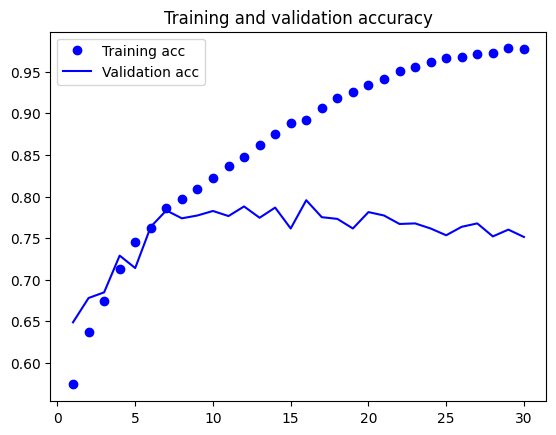

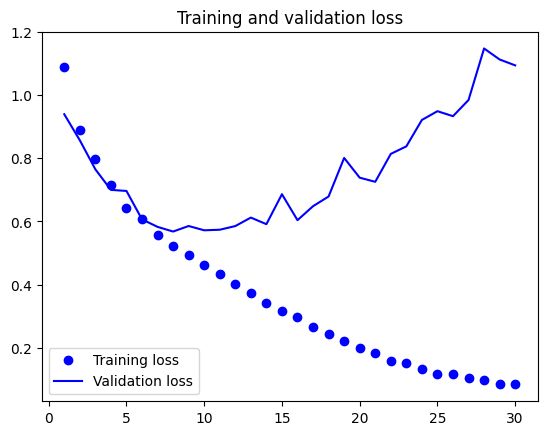

In [31]:
import matplotlib.pyplot as plt

acc= simple_history.history['accuracy']
val_acc= simple_history.history['val_accuracy']
loss= simple_history.history['loss']
val_loss= simple_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Applying Data Augmentation

In [70]:
train_aug_img_data_gen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range= 0.2,
    shear_range=0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode='nearest'
)

In [71]:
val_aug_img_data_gen= ImageDataGenerator(
    rescale= 1./255,
)

In [97]:
train_aug_generator= train_aug_img_data_gen.flow_from_directory(
    dir_base_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    shuffle= True
)

Found 13474 images belonging to 5 classes.


In [98]:
val_aug_generator= val_aug_img_data_gen.flow_from_directory(
    dir_base_val,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    shuffle= True  
)

Found 1497 images belonging to 5 classes.


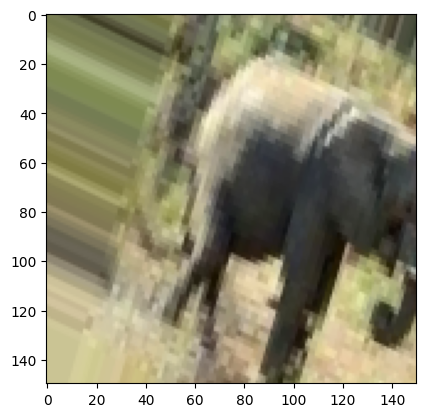

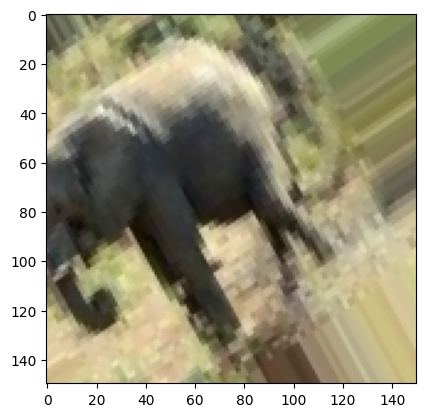

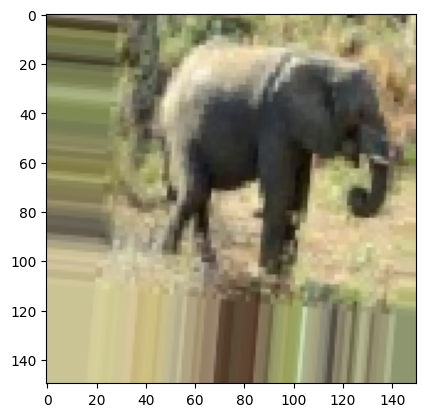

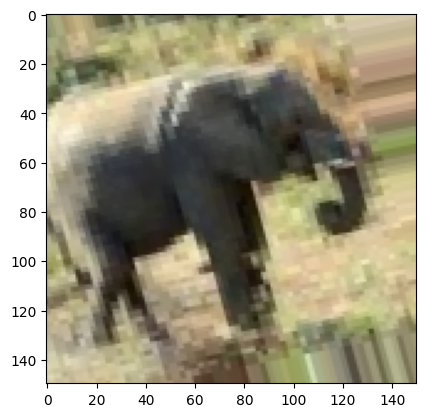

In [74]:
# displaying some random pics
from keras.preprocessing import image

fnames= [os.path.join('./data/animals/train/elephant', fname) for fname in os.listdir('./data/animals/train/elephant') ]

img_path= fnames[3]

img= image.load_img(img_path, target_size=(150,150))

x= image.img_to_array(img)
x= x.reshape((1,) + x.shape)

i=0

for batch in train_aug_img_data_gen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot= plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
    
plt.show()

In [113]:
from tensorflow.keras import regularizers

# intializing model
model_da= models.Sequential()
model_da.add(layers.Conv2D(32, (3,3), activation='relu', input_shape= input_shape, kernel_regularizer=regularizers.l2(1e-5)))
model_da.add(layers.MaxPooling2D((2,2)))
model_da.add(layers.Dropout(0.5))
model_da.add(layers.Conv2D(64, (3,3), activation= 'relu', kernel_regularizer=regularizers.l2(1e-5)))
model_da.add(layers.MaxPooling2D((2,2)))
model_da.add(layers.Dropout(0.5))
model_da.add(layers.Conv2D(128, (3,3), activation= 'relu', kernel_regularizer=regularizers.l2(1e-5)))
model_da.add(layers.MaxPooling2D((2,2)))
model_da.add(layers.Flatten())
model_da.add(layers.Dropout(0.5))
model_da.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5)))
model_da.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-5)))
model_da.add(layers.Dense(5, activation='softmax'))

In [114]:
model_da.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model_da.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [115]:
steps_per_epoch= train_aug_generator.samples // train_aug_generator.batch_size
validation_steps= val_aug_generator.samples // train_aug_generator.batch_size

In [116]:
history_da= model_da.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs= 50,
    validation_data= val_generator,
    validation_steps= validation_steps
)

Epoch 1/50
210/210 [==============================] - 55s 259ms/step - loss: 1.3666 - accuracy: 0.4139 - val_loss: 0.9913 - val_accuracy: 0.6304
Epoch 2/50
210/210 [==============================] - 54s 257ms/step - loss: 0.8331 - accuracy: 0.6705 - val_loss: 0.6755 - val_accuracy: 0.7405
Epoch 3/50
210/210 [==============================] - 54s 257ms/step - loss: 0.6549 - accuracy: 0.7446 - val_loss: 0.5894 - val_accuracy: 0.7745
Epoch 4/50
210/210 [==============================] - 54s 257ms/step - loss: 0.5988 - accuracy: 0.7653 - val_loss: 0.5190 - val_accuracy: 0.8050
Epoch 5/50
210/210 [==============================] - 54s 256ms/step - loss: 0.5287 - accuracy: 0.7913 - val_loss: 0.4372 - val_accuracy: 0.8383
Epoch 6/50
210/210 [==============================] - 54s 257ms/step - loss: 0.4888 - accuracy: 0.8098 - val_loss: 0.4820 - val_accuracy: 0.8200
Epoch 7/50
210/210 [==============================] - 54s 256ms/step - loss: 0.4465 - accuracy: 0.8270 - val_loss: 0.4503 - val_ac

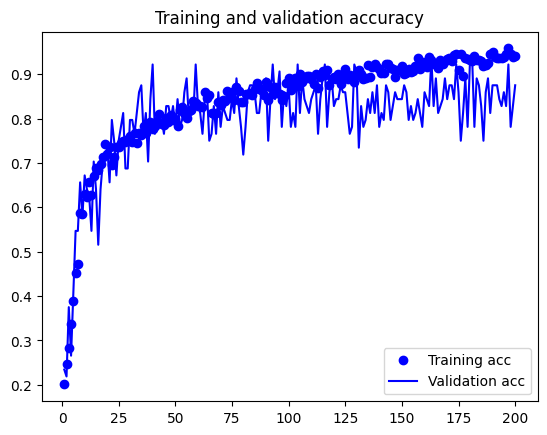

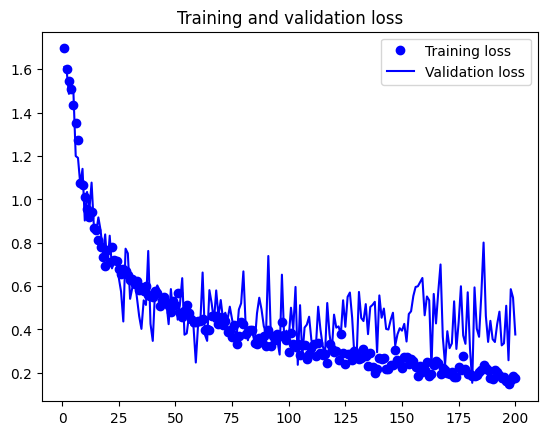

In [117]:
acc= history_da.history['accuracy']
val_acc= history_da.history['val_accuracy']
loss= history_da.history['loss']
val_loss= history_da.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The model show improvements compared to the prvious model. Following I will print the confusion matrix.

In [130]:
val_aug_generator= val_aug_img_data_gen.flow_from_directory(
    dir_base_val,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    shuffle= False  
)

Found 1497 images belonging to 5 classes.


In [136]:
import numpy
# create confusion matrix
predictions= model_da.predict(val_aug_generator, steps= val_aug_generator.samples / val_aug_generator.batch_size)
predicted_classes= numpy.argmax(predictions, axis=1)

23/23 [==============================] - 2s 102ms/step


In [137]:
animal_true_labels= val_aug_generator.classes
class_labels= list(val_aug_generator.class_indices.keys())

In [140]:
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(animal_true_labels, predicted_classes)

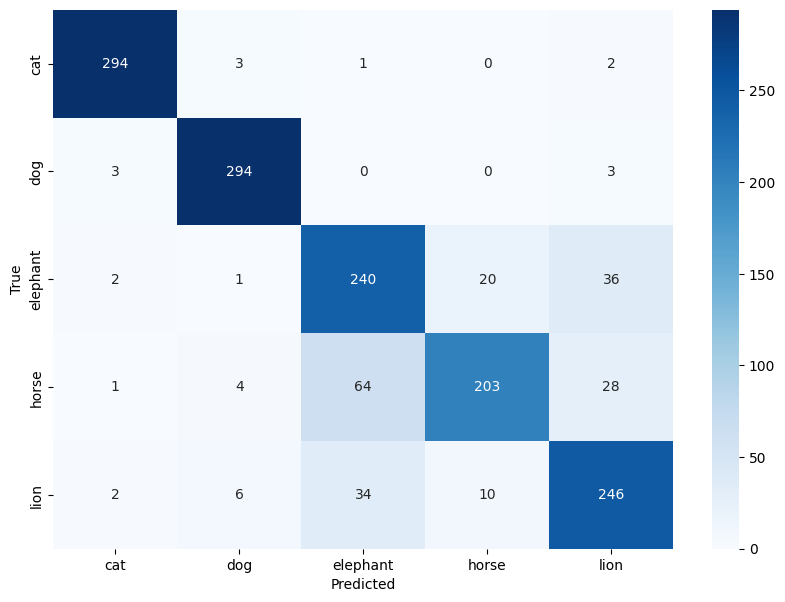

In [141]:
# If you need a textual display of the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [144]:
from sklearn.metrics import classification_report

report = classification_report(animal_true_labels, predicted_classes, target_names=class_labels)

print(report)

              precision    recall  f1-score   support

         cat       0.97      0.98      0.98       300
         dog       0.95      0.98      0.97       300
    elephant       0.71      0.80      0.75       299
       horse       0.87      0.68      0.76       300
        lion       0.78      0.83      0.80       298

    accuracy                           0.85      1497
   macro avg       0.86      0.85      0.85      1497
weighted avg       0.86      0.85      0.85      1497


In [131]:
# save the model
model_da.save('animals.keras')

# Using a pretrained convolutional Model


In [129]:
from keras.applications import VGG16

In [130]:
conv_base= VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

In [110]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [132]:
model_cbase_aug= models.Sequential()
model_cbase_aug.add(conv_base)
model_cbase_aug.add(layers.Flatten())
model_cbase_aug.add(layers.Dense(256, activation='relu'))
model_cbase_aug.add(layers.Dense(5, activation='softmax'))



In [133]:
model_cbase_aug.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_14 (Flatten)        (None, 8192)              0         
                                                                 
 dense_37 (Dense)            (None, 256)               2097408   
                                                                 
 dense_38 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 16813381 (64.14 MB)
Trainable params: 16813381 (64.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
print(f'Number of trainable wieghts: {len(model_cbase_aug.trainable_weights)}')

Number of trainable wieghts: 30


In [136]:
conv_base.trainable = False

In [137]:
print(f'Number of trainable weights after freezing model base: {len(model_cbase_aug.trainable_weights)}')

Number of trainable weights after freezing model base: 4


In [ ]:
steps_per_epoch= len(train_aug_generator) // 32
validation_steps= len(val_aug_generator) // 32

In [138]:
model_cbase_aug.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

In [139]:
history_model_cbase_aug = model_cbase_aug.fit(
    train_aug_generator,
    steps_per_epoch= steps_per_epoch,
    epochs= 100,
    validation_data= val_aug_generator,
    validation_steps= validation_steps
)

Epoch 1/100
13/13 [==============================] - 10s 745ms/step - loss: 1.9850 - accuracy: 0.3582 - val_loss: 1.4135 - val_accuracy: 0.3750
Epoch 2/100
13/13 [==============================] - 10s 731ms/step - loss: 0.8273 - accuracy: 0.6683 - val_loss: 0.5509 - val_accuracy: 0.8125
Epoch 3/100
13/13 [==============================] - 10s 740ms/step - loss: 0.7477 - accuracy: 0.7091 - val_loss: 0.3827 - val_accuracy: 0.7812
Epoch 4/100
13/13 [==============================] - 10s 729ms/step - loss: 0.6243 - accuracy: 0.7500 - val_loss: 0.6020 - val_accuracy: 0.7188
Epoch 5/100
13/13 [==============================] - 10s 739ms/step - loss: 0.5842 - accuracy: 0.7764 - val_loss: 0.6971 - val_accuracy: 0.6875
Epoch 6/100
13/13 [==============================] - 10s 731ms/step - loss: 0.6617 - accuracy: 0.7260 - val_loss: 0.6956 - val_accuracy: 0.7188
Epoch 7/100
13/13 [==============================] - 10s 771ms/step - loss: 0.6154 - accuracy: 0.7596 - val_loss: 0.5433 - val_accuracy:

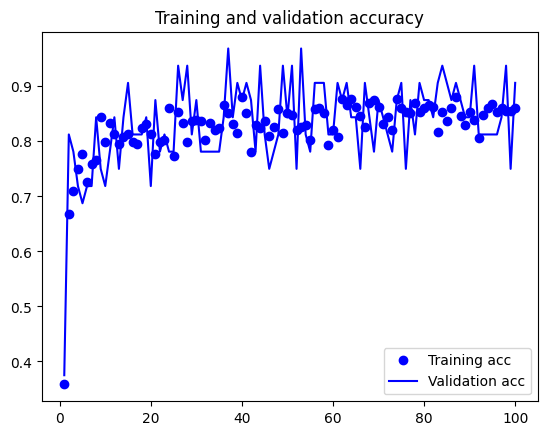

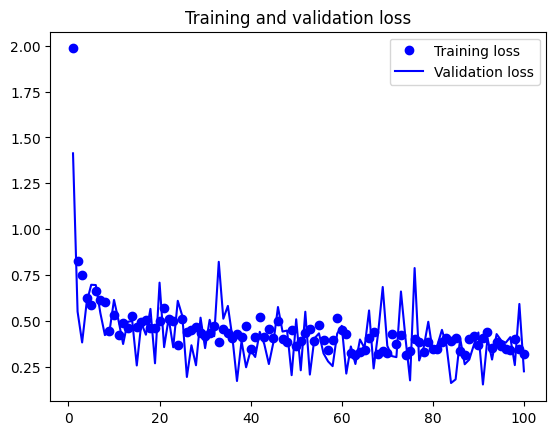

In [140]:
acc= history_model_cbase_aug.history['accuracy']
val_acc= history_model_cbase_aug.history['val_accuracy']
loss= history_model_cbase_aug.history['loss']
val_loss= history_model_cbase_aug.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# References:

[1] Kaggle - Animals: Animals Classification Dataset; Url: https://www.kaggle.com/datasets/antobenedetti/animals/